In [1]:
import warnings
warnings.filterwarnings('ignore')

# Kiva Project

**(adapted from https://bit.ly/2J7G9f8)**

## PROBLEM:

### Context

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

Submissions in this challenge will take the form of Python data analysis.

Kiva has provided a dataset of loans issued over the 2014-2018 time period, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

### Problem statement

For the locations in which Kiva has active loans, the objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

### Personal disclaimer

From a research perspective, the results obtained are never going to be a full representation of the realities that borrowers experience. It is meant to spark a discussion around how we can identify the welfare level of borrowers and improve them where we can.


## SOLUTION:

### Python Packages & Functions

Here we upload all the Python packages and datasets required for analysis.

In [2]:
# Packages
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Data

#### 1. Original Data

In [3]:
loan_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//data//kiva-project//kiva_loans.csv')

location_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//data//kiva-project//kiva_mpi_region_locations.csv')

loan_themes  = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//data//kiva-project//loan_theme_ids.csv')

regional_lts = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//data//kiva-project//loan_themes_by_region.csv')

In [4]:
dfs = {'loan_data':loan_data, 'location_data':location_data,
       'loan_themes':loan_themes, 'regional_lts':regional_lts}

for key, val in dfs.items():

    print(str(key+' shape:'), val.shape)

loan_data shape: (671205, 20)
location_data shape: (2772, 9)
loan_themes shape: (779092, 4)
regional_lts shape: (15736, 21)


<br>

<u>**Descriptions of the original datasets**</u>
 
 There are four data sources provided by Kiva:

* ***loan_data***
    1. **id** - Unique ID for loan
    2. **funded_amount** - The amount disbursed by Kiva to the field agent (USD)
    3. **loan_amount** - The amount disbursed by the field agent to the borrower (USD)
    4. **activity** - More granular category
    5. **sector** - High level category
    6. **use** - Exact usage of loan amount
    7. **country_code** - ISO country code of country in which loan was disbursed
    8. **country** - Full country name of country in which loan was disbursed
    9. **region** - Full region name within the country
    10. **currency** - The currency in which the loan was disbursed
    11. **partner_id** - ID of partner organization
    12. **posted_time** - The time at which the loan is posted on Kiva by the field agent
    13. **disbursed_time** - The time at which the loan is disbursed by the field agent to the borrower
    14. **funded_time** - The time at which the loan posted to Kiva gets funded by lenders completely
    15. **term_in_months** - The duration for which the loan was disbursed in months
    16. **lender_count** - The total number of lenders that contributed to this loan
    17. **tags**
    18. **borrower_genders** - Comma separated M,F letters, where each instance represents a single male/female in the group
    19. **repayment_interval**
    20. **date**

* ***location_data***
    1. **LocationName** - region, country
    2. **ISO** - some sort of unique abbreviation for country
    3. **country** - country
    4. **region** - region within country
    5. **world_region** - parts of the world
    6. **MPI** - multidimensional poverty index
    7. **geo** - (latitude, longitude)
    8. **lat** - latitude
    9. **lon** - longitude

* ***loan_themes***
    1. **id** - Unique ID for loan (Loan ID)
    2. **Loan Theme ID** - ID for Loan Theme
    3. **Loan Theme Type** - Category name of type of loan
    4. **Partner ID**

* ***regional_lts***
    1. **Partner ID**
    2. **Field Partner Name**
    3. **sector**
    4. **Loan Theme ID**
    5. **Loan Theme Type**
    6. **country**
    7. **forkiva**
    8. **region**
    9. **geocode_old**
    10. **ISO**
    11. **number**
    12. **amount**
    13. **LocationName**
    14. **geocode**
    15. **names**
    16. **geo**
    17. **lat**
    18. **lon**
    19. **mpi_region**
    20. **mpi_geo**
    21. **rural_pct**

<br>

#### 2. Supplementary Data

In this section, we aim to gather the following data from the World Bank:

[Per Capita Expenditure (PCE)](https://www.quora.com/What-does-per-capita-expenditure-mean?share=1) for each country - this is the total market value of all purchases in a country divided by that country's total population (data: https://bit.ly/3blw0be)

In [5]:
# Per Capita Expenditure
PCE_data = pd.read_csv('C://Users//CT//Documents//GitHub//knowledge-hub//book//data//kiva-project//PCE data.tsv', sep='\t')

print('PCE data shape:',PCE_data.shape)

PCE_data = PCE_data.drop(['Unnamed: 61'],axis=1) # dropping the column containing only NaN values

PCE data shape: (185, 62)


In [6]:
# add this dataset to the dictionary
dfs['PCE_data'] = PCE_data

dfs.keys()

dict_keys(['loan_data', 'location_data', 'loan_themes', 'regional_lts', 'PCE_data'])

<br>

#### Data Summary

In [7]:
for key, val in dfs.items():

    # 1. Get the summary table
    num_summary = val.describe()
    cat_summary = val.loc[:,val.dtypes==np.object].describe(include=['O'])
    
    # 2. Display it

    print('\nSUMMARY STATISTICS WITHOUT AGGREGATION: {}'.format(key),'\n')
    
    display(num_summary)
    
    print('\n')
    
    display(cat_summary)
    
    print('\n')


SUMMARY STATISTICS WITHOUT AGGREGATION: loan_data 



,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308





SUMMARY STATISTICS WITHOUT AGGREGATION: location_data 



,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


,LocationName,ISO,country,region,world_region,geo
count,984,1008,1008,984,1008,2772
unique,984,102,102,928,6,881
top,"Bombali, Sierra Leone",NGA,Nigeria,Eastern,Sub-Saharan Africa,"(1000.0, 1000.0)"
freq,1,37,37,8,432,1880





SUMMARY STATISTICS WITHOUT AGGREGATION: loan_themes 



,id,Partner ID
count,7.790920e+05,764279.000000
mean,1.047475e+06,180.825840
std,2.282538e+05,97.914029
min,6.386310e+05,9.000000
25%,8.499768e+05,126.000000
50%,1.046528e+06,145.000000
75%,1.244768e+06,204.000000
max,1.444243e+06,557.000000


,Loan Theme ID,Loan Theme Type
count,764279,764279
unique,956,203
top,a1050000000wf0q,General
freq,110264,380693





SUMMARY STATISTICS WITHOUT AGGREGATION: regional_lts 



,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484101,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,LocationName,geocode,names,geo,mpi_region,mpi_geo
count,15736,15736,15736,15736,15736,15736,15736,1200,15722,15736,13662,13661,15736,15722,9671
unique,302,11,718,170,79,2,9526,340,77,9561,6557,6275,6558,392,335
top,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,Chouf,"(-1.2833333, 36.8166667)",PHL,"Chouf, Lebanon","[(19.7126764, 105.8393447)]",Philippines,"(1000.0, 1000.0)","Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)"
freq,1207,13679,1152,5661,3467,13211,25,20,3467,25,43,137,2074,1174,1174





SUMMARY STATISTICS WITHOUT AGGREGATION: PCE_data 



,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,185,43,44,45,45,47,50,51,52,52,...,178,164,163,162,160,158,157,156,152,137
unique,185,43,44,45,45,47,50,51,52,52,...,178,164,163,162,160,158,157,156,152,137
top,Portugal,358.28,694.83,"4,162.15","1,022.73",734.25,"12,299.20",782.56,577.19,"3,813.85",...,"1,890.92","1,257.63","2,851.80",563.96,"9,436.84","39,584.00","19,181.30","9,555.73","2,877.38","1,413.68"
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,185,43,44,45,45,47,50,51,52,52,...,178,164,163,162,160,158,157,156,152,137
unique,185,43,44,45,45,47,50,51,52,52,...,178,164,163,162,160,158,157,156,152,137
top,Portugal,358.28,694.83,"4,162.15","1,022.73",734.25,"12,299.20",782.56,577.19,"3,813.85",...,"1,890.92","1,257.63","2,851.80",563.96,"9,436.84","39,584.00","19,181.30","9,555.73","2,877.38","1,413.68"
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Exploratory Data Analysis

#### The impact of KIVA donors

In this section, we seek to explore the data to answer certain questions around KIVA donor contributions.

<br>

_**1. How much of the total loan amount has Kiva financed?**_

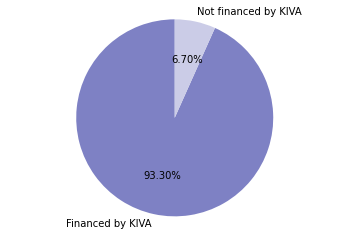

In [8]:
# 1. Calculate the percentage of loan requests that have been funded
percentage1 = (loan_data.funded_amount.sum()/loan_data.loan_amount.sum())*100
percentage1 = round(percentage1, 2)

# 2. Display the result
status = ['Financed by KIVA','Not financed by KIVA']

values = [percentage1, (100-percentage1)]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90,
        colors=np.array(['#7e81c4','#cbcce7']))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<br>

_**2. How much money have Kiva donors contributed over time?**_


 DAILY CONTRIBUTIONS OF KIVA DONORS AS A COLLECTIVE


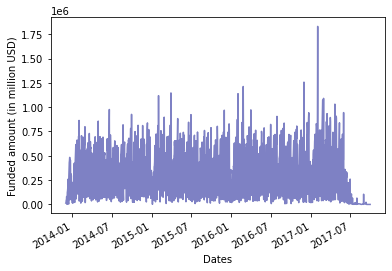

In [9]:
print('\n', 'DAILY CONTRIBUTIONS OF KIVA DONORS AS A COLLECTIVE')

# convert datetime values to appropriate formats
loan_data['posted_time'] = loan_data['posted_time'].astype('datetime64')
loan_data['disbursed_time'] = loan_data['disbursed_time'].astype('datetime64')
loan_data['funded_time'] = loan_data['funded_time'].astype('datetime64')

# pick out dates
loan_data.loc[:,'disbursement_date'] = loan_data['disbursed_time'].dt.date

# create a pivot-table
tab1 = pd.pivot_table(loan_data, values='funded_amount', index=['disbursement_date'], aggfunc='sum')

# plot this table
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots()

ax.plot(tab1.index, tab1['funded_amount'], color='#7e81c4')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# declare the title and show the completed graph

plt.xlabel('Dates')

plt.ylabel('Funded amount (in million USD)')

plt.show()

<br>

_**3. How much money have Kiva donors given to individual loans?**_

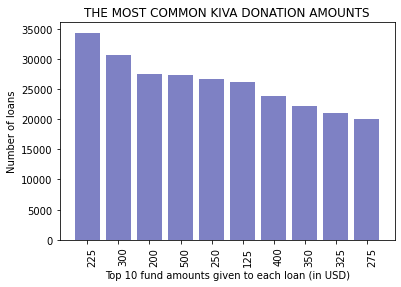

In [10]:
# create a pivot-table
loan_count_per_funded_amount = pd.pivot_table(loan_data, values='id', index=['funded_amount'], aggfunc='count')

# rename the column
loan_count_per_funded_amount.columns = ['number_of_loans']

# sort the results in descending order
loan_count_per_funded_amount = loan_count_per_funded_amount.sort_values(by=['number_of_loans'], ascending=False)

# and display top 10 results
amounts = ['225','300','200','500','250','125','400','350','325','275']

fig, ax = plt.subplots()

ax.bar(amounts,loan_count_per_funded_amount.iloc[0:10,0],color='#7e81c4')

plt.ylabel('Number of loans')

ax.set_xticklabels(labels=amounts, rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 10 fund amounts given to each loan (in USD)')

plt.title('THE MOST COMMON KIVA DONATION AMOUNTS')

plt.show()

<br>

_**4. How much money have Kiva donors given to individual countries?**_

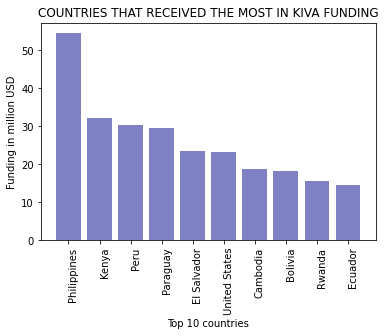

In [11]:
# create a pivot-table
tab2 = pd.pivot_table(loan_data, values='funded_amount', index=['country'], aggfunc='sum')

# sort the results in descending order
tab2 = tab2.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab2.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab2 = tab2.reset_index(level=['country'])

# and display top 10 results

fig, ax = plt.subplots()

ax.bar(tab2.iloc[0:10,0],(tab2.iloc[0:10,1]/1000000),color='#7e81c4')

plt.ylabel('Funding in million USD')

ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 10 countries')

plt.title('COUNTRIES THAT RECEIVED THE MOST IN KIVA FUNDING')

plt.show()

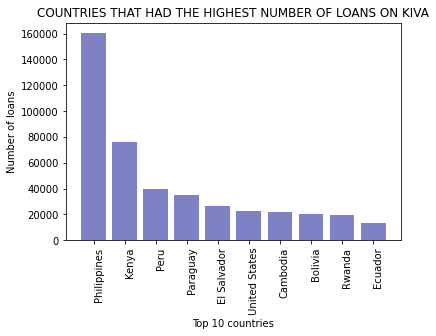

In [12]:
# create a pivot-table
loans_per_country = pd.pivot_table(loan_data, values='id', index=['country'], aggfunc='count')

# sort the results in descending order
loans_per_country = loans_per_country.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loans_per_country.columns = ['number_of_loans']

# make some index entries into columns
loans_per_country = loans_per_country.reset_index(level=['country'])

# and display top 10 results
loans_per_country.head(10)

# and display top 10 results

fig, ax = plt.subplots()

ax.bar(loans_per_country.iloc[0:10,0],loans_per_country.iloc[0:10,1],color='#7e81c4')

plt.ylabel('Number of loans')

ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 10 countries')

plt.title('COUNTRIES THAT HAD THE HIGHEST NUMBER OF LOANS ON KIVA')

plt.show()

This shows that the top 10 countries in terms of the number of loans and amount of funding from KIVA were the same and each country maintained its position.

Countries that had the highest contribution per loan were:

In [13]:
# initial status message
print('The shape of tab2 before merge: ', tab2.shape)

# join the data, keeping only relevant entries
tab2 = tab2.merge(loans_per_country, on='country')

# final status message
print('The shape of tab2 after merge: ', tab2.shape)

The shape of tab2 before merge:  (87, 2)
The shape of tab2 after merge:  (87, 3)


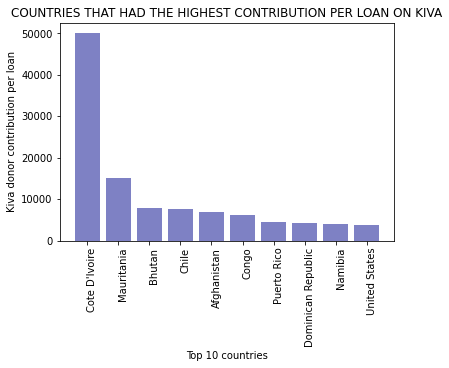

In [14]:
# add a calculated column to the newly merged tab2
tab2.loc[:, 'contribution_per_loan'] = tab2['sum_of_funded_amount']/tab2['number_of_loans']

# sort the results in descending order
tab2 = tab2.sort_values(by=['contribution_per_loan'], ascending=False)

# and display top 10 results

fig, ax = plt.subplots()

ax.bar(tab2.iloc[0:10,0], round(tab2.iloc[0:10,3], 2), color='#7e81c4')

plt.ylabel('Kiva donor contribution per loan')

ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 10 countries')

plt.title('COUNTRIES THAT HAD THE HIGHEST CONTRIBUTION PER LOAN ON KIVA')

plt.show()

Countries that had the lowest contribution per loan were:

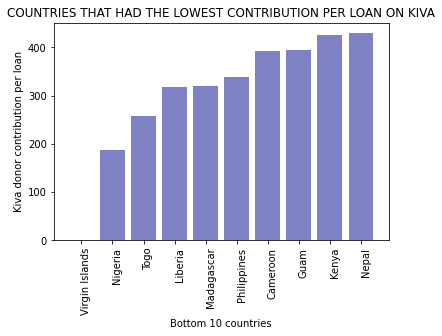

In [15]:
# add a calculated column to the newly merged tab2
tab2.loc[:, 'contribution_per_loan'] = tab2['sum_of_funded_amount']/tab2['number_of_loans']

# sort the results in ascending order
tab2 = tab2.sort_values(by=['contribution_per_loan'], ascending=True)

# and display top 10 results

fig, ax = plt.subplots()

ax.bar(tab2.iloc[0:10,0], round(tab2.iloc[0:10,3], 2), color='#7e81c4')

plt.ylabel('Kiva donor contribution per loan')

ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Bottom 10 countries')

plt.title('COUNTRIES THAT HAD THE LOWEST CONTRIBUTION PER LOAN ON KIVA')

plt.show()

<br>

_**5. What is the geographical footprint of where funds given by KIVA donors end up?**_

In [16]:
# make a copy of the loan_data dataset and combine it with partner data
loan_data_copy = loan_data.copy()

# ensure that the common column is the same datatype and they share the same name
# the datatype chosen was float64 to preserve any decimal points
print(loan_data_copy.iloc[:,10].name) # original name; stays the same
print('')

print(regional_lts.iloc[:,0].name) #original name - will be changed
#change column name
regional_lts.columns = ['partner_id', 'Field Partner Name', 'sector',
                        'Loan Theme ID', 'Loan Theme Type', 'country',
                        'forkiva', 'region', 'geocode_old',
                        'ISO', 'number', 'amount',
                        'LocationName', 'geocode', 'names',
                        'geo', 'lat', 'lon',
                        'mpi_region', 'mpi_geo', 'rural_pct']
# confirm change
print(regional_lts.iloc[:,0].name)

# change the datatype
regional_lts.iloc[:,0] = regional_lts.iloc[:,0].astype('float64')

partner_id

Partner ID
partner_id


In [17]:
# create a pivot-table
tab3 = pd.pivot_table(loan_data_copy, values='funded_amount', index=['partner_id'], aggfunc='sum')

# sort the results in descending order
tab3 = tab3.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab3.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab3 = tab3.reset_index(level=['partner_id'])

In [18]:
# create another pivot-table
tab4 = pd.pivot_table(regional_lts, values='amount',
                      index=['partner_id', 'Field Partner Name',
                             'country'],
                      aggfunc='count')

# sort the results in descending order
tab4 = tab4.sort_values(by=['amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab4.columns = ['count_of_amount']

# make some index entries into columns
tab4 = tab4.reset_index(level=['partner_id', 'Field Partner Name', 'country'])

In [19]:
# create a third pivot-table
tab5 = pd.pivot_table(loan_data_copy, values='id', index=['partner_id'], aggfunc='count')

# sort the results in descending order
tab5 = tab5.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
tab5.columns = ['number_of_loans']

# make some index entries into columns
tab5 = tab5.reset_index(level=['partner_id'])

In [20]:
# initial status message
print('The shape of tab3 before merge: ', tab3.shape)

# join the data, keeping only relevant entries
tab3 = tab3.merge(tab5, on='partner_id')

# final status message
print('The shape of tab3 after merge: ', tab3.shape)


# initial status message
print('The shape of tab3 before merge: ', tab3.shape)

# join the data, keeping only relevant entries
tab3 = tab3.merge(tab4, on='partner_id')

# final status message
print('The shape of tab3 after merge: ', tab3.shape)


percentage2 = tab3.shape[0]/366 * 100
percentage2 = round(percentage2, 0)

print('Out of the 366 partners that disbursed loans, KIVA had the contact details of '+str(percentage2)+'% of them.')

The shape of tab3 before merge:  (366, 2)
The shape of tab3 after merge:  (366, 3)
The shape of tab3 before merge:  (366, 3)
The shape of tab3 after merge:  (331, 6)
Out of the 366 partners that disbursed loans, KIVA had the contact details of 90.0% of them.


The partners that received the most funding by KIVA were:

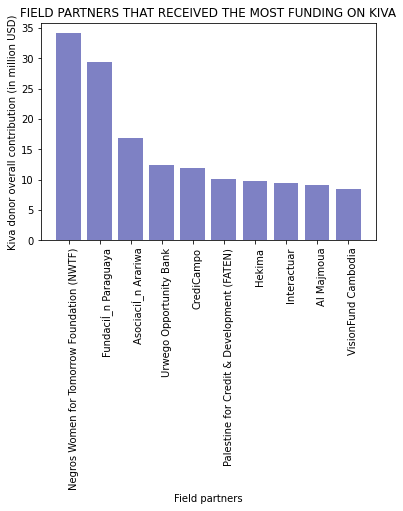

In [21]:
# to have more details of the partners that received the most funding by KIVA,
# sort the results in descending order
tab3 = tab3.sort_values(by=['sum_of_funded_amount'], ascending=False)

# drop the unecessary columns
tab3 = tab3.drop('count_of_amount',1)

# display top 10 results; do they match with the original tab3? They match!

fig, ax = plt.subplots()

ax.bar(tab3.iloc[0:10,3], (tab3.iloc[0:10,1]/1000000), color='#7e81c4')

plt.ylabel('Kiva donor overall contribution (in million USD)')

ax.set_xticklabels(labels=tab3.iloc[0:10,3], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Field partners')

plt.title('FIELD PARTNERS THAT RECEIVED THE MOST FUNDING ON KIVA')

plt.show()

The partners that serviced the highest number of loans on KIVA were:

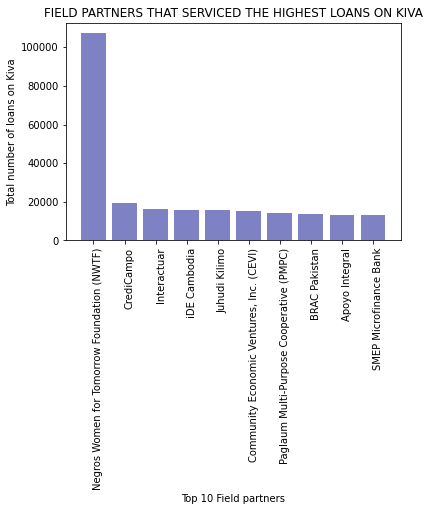

In [22]:
# sort the results in descending order
tab3 = tab3.sort_values(by=['number_of_loans'], ascending=False)

# display top 10 results in terms of number of loans

fig, ax = plt.subplots()

ax.bar(tab3.iloc[0:10,3], tab3.iloc[0:10,2], color='#7e81c4')

plt.ylabel('Total number of loans on Kiva')

ax.set_xticklabels(labels=tab3.iloc[0:10,3], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 10 Field partners')

plt.title('FIELD PARTNERS THAT SERVICED THE HIGHEST LOANS ON KIVA')

plt.show()

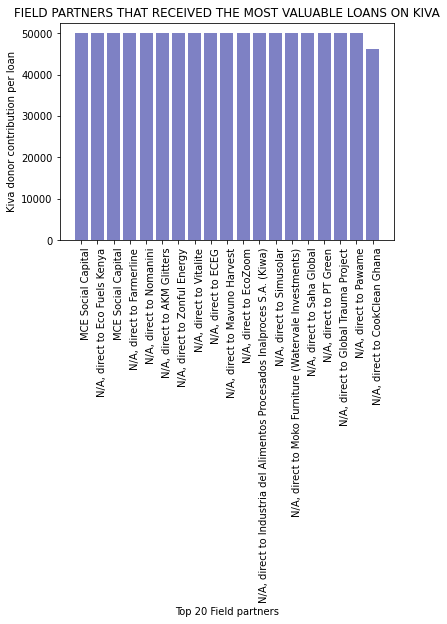

In [23]:
# add a calculated column to the newly merged tab3
tab3.loc[:, 'contribution_per_loan'] = tab3['sum_of_funded_amount']/tab3['number_of_loans']

# sort the results in descending order
tab3 = tab3.sort_values(by=['contribution_per_loan'], ascending=False)

# display top 20 results in terms of donor contribution per loan

fig, ax = plt.subplots()

ax.bar(tab3.iloc[0:20,3], tab3.iloc[0:20,5], color='#7e81c4')

plt.ylabel('Kiva donor contribution per loan')

ax.set_xticklabels(labels=tab3.iloc[0:20,3], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Top 20 Field partners')

plt.title('FIELD PARTNERS THAT RECEIVED THE MOST VALUABLE LOANS ON KIVA')

plt.show()

The per capita contribution shows most of the largest contributions per loan actually went directly to social impact businesses.

<br>

<br>

#### The characteristics of KIVA borrowers

In this section, we seek to understand KIVA borrower characteristics.

<br>

_**1. What is the size of the shortfall for each individual borrower in a given sector?**_

In [24]:
# create a pivot-table
tab6 = pd.pivot_table(loan_data_copy, values='funded_amount', index=['sector'], aggfunc='sum')

# sort the results in descending order
tab6 = tab6.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab6.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab6 = tab6.reset_index(level=['sector'])

In [25]:
# create another pivot-table
loans_by_sector = pd.pivot_table(loan_data_copy, values='id', index=['sector'], aggfunc='count')

# sort the results in descending order
loans_by_sector = loans_by_sector.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loans_by_sector.columns = ['number_of_loans']

# make some index entries into columns
loans_by_sector = loans_by_sector.reset_index(level=['sector'])

In [26]:
# create a third pivot-table
loan_amounts_by_sector = pd.pivot_table(loan_data_copy, values='loan_amount', index=['sector'], aggfunc='sum')

# sort the results in descending order
loan_amounts_by_sector = loan_amounts_by_sector.sort_values(by=['loan_amount'], ascending=False)

# rename the aggregated column to an appropiate label
loan_amounts_by_sector.columns = ['sum_of_loan_amount']

# make some index entries into columns
loan_amounts_by_sector = loan_amounts_by_sector.reset_index(level=['sector'])

In [27]:
# initial status message
print('The shape of tab6 before merge: ', tab6.shape)

# join the data, keeping only relevant entries
tab6 = tab6.merge(loans_by_sector, on='sector')

# final status message
print('The shape of tab6 after merge: ', tab6.shape)


# initial status message
print('The shape of tab6 before merge: ', tab6.shape)

# join the data, keeping only relevant entries
tab6 = tab6.merge(loan_amounts_by_sector, on='sector')

# final status message
print('The shape of tab6 after merge: ', tab6.shape)

The shape of tab6 before merge:  (15, 2)
The shape of tab6 after merge:  (15, 3)
The shape of tab6 before merge:  (15, 3)
The shape of tab6 after merge:  (15, 4)


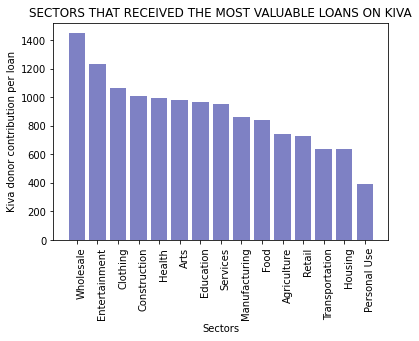

In [28]:
# assess additional metrics
tab6.loc[:, 'donor_contribution_per_loan'] = tab6['sum_of_funded_amount']/tab6['number_of_loans']
tab6.loc[:, 'funding_gap_per_loan'] = (-tab6['sum_of_loan_amount']+tab6['sum_of_funded_amount'])/tab6['number_of_loans']

# sort the results in descending order
tab6 = tab6.sort_values(by=['donor_contribution_per_loan'], ascending=False)

# display all results

fig, ax = plt.subplots()

ax.bar(tab6.iloc[:,0], tab6.iloc[:,4], color='#7e81c4')

plt.ylabel('Kiva donor contribution per loan')

ax.set_xticklabels(labels=tab6.iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Sectors')

plt.title('SECTORS THAT RECEIVED THE MOST VALUABLE LOANS ON KIVA')

plt.show()

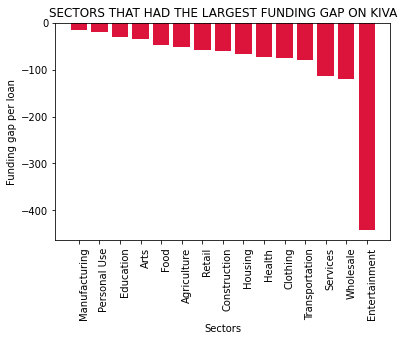

In [29]:
# sort the results in descending order
tab6 = tab6.sort_values(by=['funding_gap_per_loan'], ascending=False)

# display all results

fig, ax = plt.subplots()

ax.bar(tab6.iloc[:,0], tab6.iloc[:,5], color='crimson')

plt.ylabel('Funding gap per loan')

ax.set_xticklabels(labels=tab6.iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')

plt.xlabel('Sectors')

plt.title('SECTORS THAT HAD THE LARGEST FUNDING GAP ON KIVA')

plt.show()

In as much as Entertainment has the second most valuable loans, it appears that this sector had the highest funding gap. Manufacturing had the lowest funding gap.

<br>

_**2. How were loans and funding distributed across the genders?**_

In [30]:
loan_data_copy.loc[:, 'number_of_all_borrowers'] = loan_data_copy['borrower_genders'].str.count('male') # counts both instances of female and male - they share the 'male' element
loan_data_copy.loc[:, 'number_of_female_borrowers'] = loan_data_copy['borrower_genders'].str.count('female')
loan_data_copy.loc[:, 'number_of_male_borrowers'] = loan_data_copy['number_of_all_borrowers'] - loan_data_copy['number_of_female_borrowers']


print('We had borrower data on',
      round(loan_data_copy['number_of_all_borrowers'].count()/loan_data_copy.shape[0]*100, 2),
      '% of the loans recorded')

We had borrower data on 99.37 % of the loans recorded


<u>**How different genders group together to borrow on Kiva**</u>

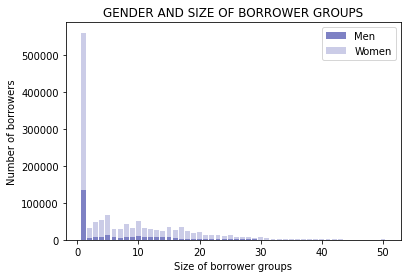

In [31]:
# create a pivot-table
borrower_group_data = pd.pivot_table(loan_data_copy, values=['number_of_male_borrowers', 'number_of_female_borrowers'],
                                     index=['number_of_all_borrowers'],aggfunc='sum')
#N/B: Using the count gives the total number of loans with borrower data; we need the sum to see the gender distribution across group size

# make some index entries into columns
borrower_group_data = borrower_group_data.reset_index(level=['number_of_all_borrowers'])


# display the results
fig, ax = plt.subplots()

ax.bar(borrower_group_data.iloc[:,0], borrower_group_data.iloc[:,2],
       label='Men', color='#7e81c4')

ax.bar(borrower_group_data.iloc[:,0], borrower_group_data.iloc[:,1],
       bottom=borrower_group_data.iloc[:,2], label='Women', color='#cbcce7')

ax.set_ylabel('Number of borrowers')

ax.set_xlabel('Size of borrower groups')

ax.set_title('GENDER AND SIZE OF BORROWER GROUPS')

ax.legend()

plt.show()

The graph above shows that most people preferred to borrow as individuals; however, there were substantially larger numbers of women in each group size compared to men.

<u>**Most common nationalities for the different genders**</u>

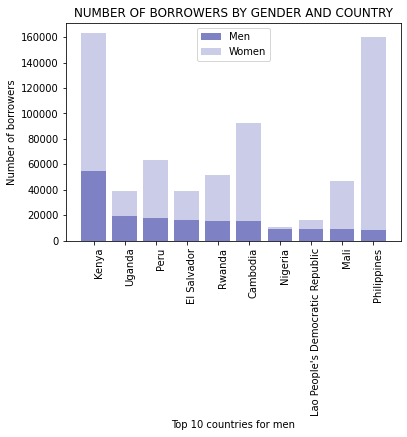

In [32]:
# create a pivot-table
borrower_country_data = pd.pivot_table(loan_data_copy, values=['number_of_male_borrowers', 'number_of_female_borrowers'],
                                       index=['country'],aggfunc='sum')


# sort the male results in descending order
borrower_country_data = borrower_country_data.sort_values(by=['number_of_male_borrowers'], ascending=False)

# make some index entries into columns
borrower_country_data = borrower_country_data.reset_index(level=['country'])


# display the results
fig, ax = plt.subplots()

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,2],
       label='Men', color='#7e81c4')

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,1],
       bottom=borrower_country_data.iloc[0:10,2], label='Women', color='#cbcce7')

ax.set_xticklabels(labels=borrower_country_data.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')

ax.set_ylabel('Number of borrowers')

ax.set_xlabel('Top 10 countries for men')

ax.set_title('NUMBER OF BORROWERS BY GENDER AND COUNTRY')

ax.legend()

plt.show()

The country with the highest number of male borrowers was Kenya, while the country where men formed the majority of KIVA borrowers was Nigeria.

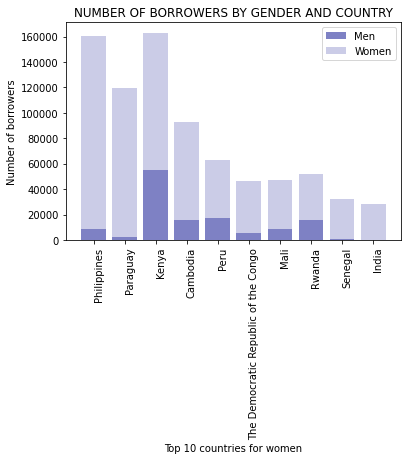

In [33]:
# sort the female results in descending order
borrower_country_data = borrower_country_data.sort_values(by=['number_of_female_borrowers'], ascending=False)

# display the results
fig, ax = plt.subplots()

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,2],
       label='Men', color='#7e81c4')

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,1],
       bottom=borrower_country_data.iloc[0:10,2], label='Women', color='#cbcce7')

ax.set_xticklabels(labels=borrower_country_data.iloc[0:10,0], rotation = (90),
                   fontsize = 10, va='top', ha='left')

ax.set_ylabel('Number of borrowers')

ax.set_xlabel('Top 10 countries for women')

ax.set_title('NUMBER OF BORROWERS BY GENDER AND COUNTRY')

ax.legend()

plt.show()

The country with the highest number of female borrowers was the Philippines, it can also be observed that nearly all borrowers were women in Paraguay and Senegal, while India appears to consist of only female borrowers.

In [34]:
# create a pivot-table
tab7 = pd.pivot_table(loan_data_copy, values=['term_in_months', 'number_of_all_borrowers', 'number_of_male_borrowers', 'number_of_female_borrowers', 'loan_amount', 'funded_amount'], index=['repayment_interval'], aggfunc='sum')

# sort the results in descending order
tab7 = tab7.sort_values(by=['number_of_all_borrowers'], ascending=False)

# make some index entries into columns
tab7 = tab7.reset_index(level=['repayment_interval'])

In [35]:
# create another pivot-table
loan_repayment = pd.pivot_table(loan_data_copy, values='id', index=['repayment_interval'], aggfunc='count')

# sort the results in descending order
loan_repayment = loan_repayment.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loan_repayment.columns = ['number_of_loans']

# make some index entries into columns
loan_repayment = loan_repayment.reset_index(level=['repayment_interval'])

In [36]:
# initial status message
print('The shape of tab7 before merge: ', tab7.shape)

# join the data, keeping only relevant entries
tab7 = tab7.merge(loan_repayment, on='repayment_interval')

# final status message
print('The shape of tab7 after merge: ', tab7.shape)

The shape of tab7 before merge:  (4, 7)
The shape of tab7 after merge:  (4, 8)


In [37]:
# Present findings in more digestible formats by:

# 1. Converting total borrowers to male and female proportions
tab7.loc[:, 'female_pct_of_total_borrowers'] = round((tab7['number_of_female_borrowers']/tab7['number_of_all_borrowers'])*100, 2)
tab7.loc[:, 'male_pct_of_total_borrowers'] = round((tab7['number_of_male_borrowers']/tab7['number_of_all_borrowers'])*100, 2)

# 2. Extracting funding amounts based on gender
tab7.loc[:, 'million_USD_female_total_funding'] = round((tab7['female_pct_of_total_borrowers']/100*tab7['funded_amount'])/1000000, 2)
tab7.loc[:, 'million_USD_male_total_funding'] = round((tab7['male_pct_of_total_borrowers']/100*tab7['funded_amount'])/1000000, 2)

# 3. Extracting loan amounts based on gender
tab7.loc[:, 'million_USD_female_total_loan_amount'] = round((tab7['female_pct_of_total_borrowers']/100*tab7['loan_amount'])/1000000, 2)
tab7.loc[:, 'million_USD_male_total_loan_amount'] = round((tab7['male_pct_of_total_borrowers']/100*tab7['loan_amount'])/1000000, 2)

# 4. Extracting funding gaps based on gender
tab7.loc[:, 'million_female_funding_gap'] = -tab7['million_USD_female_total_loan_amount']+tab7['million_USD_female_total_funding']
tab7.loc[:, 'million_male_funding_gap'] = -tab7['million_USD_male_total_loan_amount']+tab7['million_USD_male_total_funding']

In [38]:
# drop raw data columns
tab7 = tab7.drop(['funded_amount', 'loan_amount',
                  'number_of_all_borrowers', 'number_of_female_borrowers',
                  'number_of_male_borrowers'],1)

<u>**Funding received based on gender**</u>

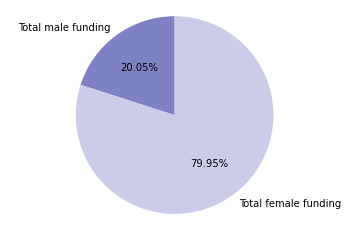

In [39]:
# display summary of funding by gender

status = ['Total male funding','Total female funding']

values = [tab7['million_USD_male_total_funding'].sum(), tab7['million_USD_female_total_funding'].sum()]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90,
        colors=np.array(['#7e81c4','#cbcce7']))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<u>**Total loan amounts taken by each gender**</u>

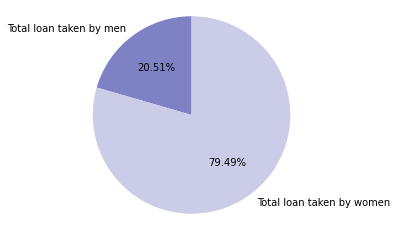

In [40]:
# display loan amounts by gender

status = ['Total loan taken by men','Total loan taken by women']

values = [tab7['million_USD_male_total_loan_amount'].sum(), tab7['million_USD_female_total_loan_amount'].sum()]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90,
        colors=np.array(['#7e81c4','#cbcce7']))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<u>**Loan repayment behaviour based on gender**</u>

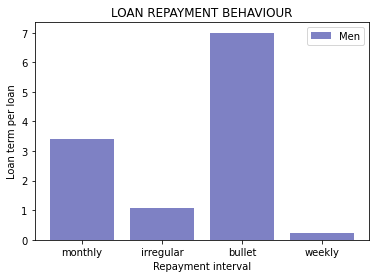

In [41]:
# Display summary of loan repayment behaviour by gender
# 1. Men
fig, ax = plt.subplots()

ax.bar(tab7.iloc[:,0],
       (tab7.iloc[:,1]/tab7.iloc[:,2])*(tab7.iloc[:,4]/100),
       label='Men', color='#7e81c4')

ax.set_ylabel('Loan term per loan')

ax.set_xlabel('Repayment interval')

ax.set_title('LOAN REPAYMENT BEHAVIOUR')

ax.legend()

plt.show()

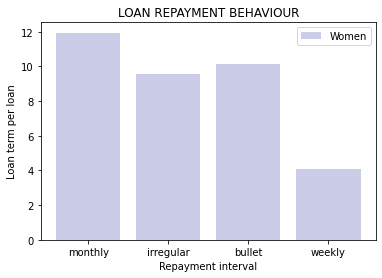

In [42]:
# 2. Women
fig, ax = plt.subplots()

ax.bar(tab7.iloc[:,0],
       (tab7.iloc[:,1]/tab7.iloc[:,2])*(tab7.iloc[:,3]/100),
       label='Women', color='#cbcce7')

ax.set_ylabel('Loan term per loan')

ax.set_xlabel('Repayment interval')

ax.set_title('LOAN REPAYMENT BEHAVIOUR')

ax.legend()

plt.show()

In as much as most men and women consistently paid off long-term loans on a monthly basis, women had a much larger time horizon to pay off their loans in general.

Additionally, a significant amount of data on repayment behaviour is missing for both genders (missing data is represented as the 'bullet group').

<u>**Funding gap in millions faced by each gender**</u>

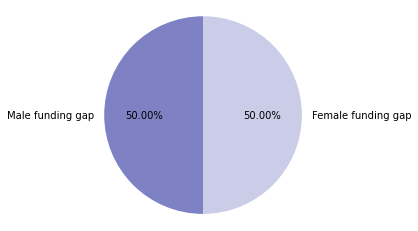

In this instance, both men and women have the same size of funding gap, 10.19 million US dollars
over the time period the data was collected.


In [43]:
# display summary of funding gap by gender

status = ['Male funding gap','Female funding gap']

values = [abs(tab7['million_male_funding_gap'].sum()), abs(tab7['million_male_funding_gap'].sum())]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90,
        colors=np.array(['#7e81c4','#cbcce7']))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print('In this instance, both men and women have the same size of funding gap, {} million US dollars\nover the time period the data was collected.'
      .format(round(
          abs(tab7['million_male_funding_gap'].sum()),
          2)
             )
     )

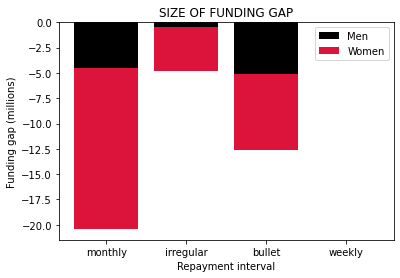

In [44]:
# display summary of the funding gap by gender and monthly repayment behaviour
fig, ax = plt.subplots()

ax.bar(tab7.iloc[:,0], tab7.iloc[:,10], label='Men', color='black')

ax.bar(tab7.iloc[:,0], tab7.iloc[:,9], bottom=tab7.iloc[:,10], label='Women', color='crimson')

ax.set_ylabel('Funding gap (millions)')

ax.set_xlabel('Repayment interval')

ax.set_title('SIZE OF FUNDING GAP')

ax.legend()

plt.show()

The graph above indicates that in as much as women are getting much more funding than men, those in the monthly repayment group still have a significant funding gap. Furthermore, the second-largest funding gap was not from those people belonging to the irregular payments group, but those belonging to the group that had missing data on payment behaviour. This makes sense because there may be a lack of trust that makes KIVA donors not foot the entire loan of those with missing repayment plans.

<br>

<br>

### Global welfare

In this section, we seek to explore the data to understand the financial well-being of various countries with the aid of an external dataset

_**1. What percentage of their monthly expenditure does the average citizen devote to loan repayments?**_

The purchasing power of various countries of the world can be visualized in the form of the monthly income table below:

In [45]:
# Made a copy of the data: 
expenditure = PCE_data.copy()

# Convert any 'n/a' strings to NaN values
expenditure = expenditure.replace('n/a', np.nan)

# Convert any numeric data stored as a string into a decimal
cols = expenditure.columns[1:61]

for col in cols:
    expenditure.loc[:,col] = expenditure[col].str.replace(',','')

for col in cols:
    expenditure.loc[:,col] = expenditure[col].astype('float64')
    
MonthlyExpenditure = (expenditure.loc[:,'2013':'2017'].copy())/12

MonthlyExpenditure.loc[:,'country'] = expenditure['Country']

# Drop any null columns
MonthlyExpenditure = MonthlyExpenditure.dropna()

MonthlyExpenditure

,2013,2014,2015,2016,2017,country
1,582.357500,586.271667,584.475000,591.529167,592.816667,American Samoa
2,61.932500,63.661667,66.361667,69.737500,71.814167,Cambodia
3,175.452500,190.616667,206.155833,223.367500,243.301667,China
5,164.263333,170.690000,176.700000,183.363333,190.249167,Indonesia
6,121.336667,124.944167,137.075833,141.720833,145.214167,Kiribati
...,...,...,...,...,...,...
179,91.753333,91.670000,92.621667,93.139167,93.662500,Sudan
180,42.089167,42.224167,43.976667,43.604167,43.282500,Tanzania
181,36.333333,37.132500,37.786667,38.175000,37.630833,Togo
182,54.592500,54.118333,57.973333,56.637500,54.675000,Uganda


<br>

In turn, the monthly repayments of various countries of the world can be visualized in the form of the monthly repayments table below:

In [46]:
# get the monthly repayment on each loan
loan_data_copy.loc[:, 'monthly_loan_repayment'] = loan_data_copy['loan_amount']/loan_data_copy['term_in_months']

# get the year that the loan was issued
loan_data_copy.loc[:,'disbursement_year'] = loan_data['disbursed_time'].dt.year

# create a pivot-table
tab8 = pd.pivot_table(loan_data_copy, values=['monthly_loan_repayment'], columns='disbursement_year', index=['country'], aggfunc='mean')

# drop level and rename columns
tab8 = tab8.droplevel('disbursement_year', axis=1)
tab8.columns = ['monthly_loan_repayment 2013', 'monthly_loan_repayment 2014',
                'monthly_loan_repayment 2015', 'monthly_loan_repayment 2016',
                'monthly_loan_repayment 2017']

# make some index entries into columns
tab8 = tab8.reset_index(level=['country'])

# and display all results
tab8

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017
0,Afghanistan,NaN,NaN,750.000000,1333.333333,NaN
1,Albania,62.227835,64.557728,54.131447,55.527071,61.604227
2,Armenia,64.103653,64.558263,51.850628,49.406712,50.580462
3,Azerbaijan,105.071779,108.725509,82.548595,59.692751,NaN
4,Belize,NaN,18.405275,NaN,22.880435,NaN
...,...,...,...,...,...,...
80,Vanuatu,NaN,62.500000,NaN,NaN,NaN
81,Vietnam,68.839701,91.272779,97.516549,90.730029,69.997056
82,Yemen,62.567830,57.303204,60.290609,43.056244,42.720586
83,Zambia,NaN,81.800068,93.311061,107.013918,74.278048


<br>

We need to find the countries shared in common between the Kiva.org and the UN dataset as follows:

In [47]:
# compare country/territory labels in the 2 datasets
print(tab8['country'].unique())
print('')
print(MonthlyExpenditure['country'].unique())

['Afghanistan' 'Albania' 'Armenia' 'Azerbaijan' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Brazil' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Chile'
 'China' 'Colombia' 'Congo' 'Costa Rica' "Cote D'Ivoire"
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Georgia' 'Ghana'
 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iraq' 'Israel'
 'Jordan' 'Kenya' 'Kosovo' 'Kyrgyzstan' "Lao People's Democratic Republic"
 'Lebanon' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mexico' 'Moldova' 'Mongolia' 'Mozambique' 'Myanmar (Burma)' 'Namibia'
 'Nepal' 'Nicaragua' 'Nigeria' 'Pakistan' 'Palestine' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Puerto Rico' 'Rwanda'
 'Saint Vincent and the Grenadines' 'Samoa' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'Somalia' 'South Africa' 'South Sudan' 'Suriname'
 'Tajikistan' 'Tanzania' 'Thailand' 'The Democratic Republic of the Congo'
 'Timor-Leste' 'Togo' 'Turkey' 'Uganda' 'Ukraine' 'United States'
 'Vanuatu' 'Vietnam' 'Yemen' 'Zambia

In [48]:
# MATCH COUNTRIES IN KIVA LOAN DATA AND THOSE IN THE ORIGINAL DATASET IF THEY HAVE DIFFERENT SPELLINGS 

tab8.iloc[16,0] = 'Congo, Republic of'
tab8.iloc[18,0] = "Cote d'Ivoire"
tab8.iloc[21,0] = 'Egypt, Arab Republic of'
tab8.iloc[35,0] = 'Kyrgyz Republic'
tab8.iloc[48,0] = 'Myanmar'
tab8.iloc[54,0] = 'West Bank and Gaza'
# tab8.iloc[61,0] missing in other dataset
# tab8.iloc[62,0] missing in other dataset; only have American Samoa

# tab8.iloc[63,0] missing in other dataset
# tab8.iloc[65,0] missing in other dataset
# tab8.iloc[66,0] missing in other dataset
tab8.iloc[73,0] = 'Congo, Democratic Republic of'
# tab8.iloc[82,0] missing in other dataset

#CHECK FOR COUNTRIES NOT WITHIN EITHER ONE OF THE DATASET
tab8[tab8['country'].isin(MonthlyExpenditure['country']) == False]

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017
0,Afghanistan,NaN,NaN,750.000000,1333.333333,NaN
3,Azerbaijan,105.071779,108.725509,82.548595,59.692751,NaN
30,Iraq,173.604827,198.899334,186.551621,NaN,NaN
36,Lao People's Democratic Republic,NaN,122.887368,76.689249,78.100108,55.966610
48,Myanmar,NaN,1084.647495,301.828805,153.652721,80.601104
61,Saint Vincent and the Grenadines,NaN,43.601190,91.355946,NaN,NaN
62,Samoa,45.125878,64.451621,56.148887,63.796669,60.880531
65,Solomon Islands,NaN,50.795455,64.064459,79.784429,69.712160
66,Somalia,NaN,272.774699,230.544232,564.285714,510.714286
68,South Sudan,NaN,75.533234,44.681710,NaN,6250.000000


The table above shows countries that are missing in either of the datasets and will not be included.

**The percentage of monthly expenditure that the average citizen devote to loan repayments is visualized below:**

In [49]:
# initial status message
print('The shape of tab8 before merge: ', tab8.shape)

# join the data, keeping only relevant entries
tab8 = tab8.merge(MonthlyExpenditure, on='country')

# final status message
print('The shape of tab8 after merge: ', tab8.shape)

The shape of tab8 before merge:  (85, 6)
The shape of tab8 after merge:  (70, 11)


In [50]:
years = ['2013','2014','2015','2016','2017']

for year in years:
    tab8.loc[:, f'% of monthly expenditure, {year}'] = (tab8[f'monthly_loan_repayment {year}']/tab8[f'{year}']) * 100
    tab8[f'% of monthly expenditure, {year}'] = round(tab8[f'% of monthly expenditure, {year}'], 2)
    tab8 = tab8.drop([f'monthly_loan_repayment {year}',f'{year}'], axis=1)

# sort the results in descending order
tab8 = tab8.sort_values(by=['% of monthly expenditure, 2017'], ascending=False)

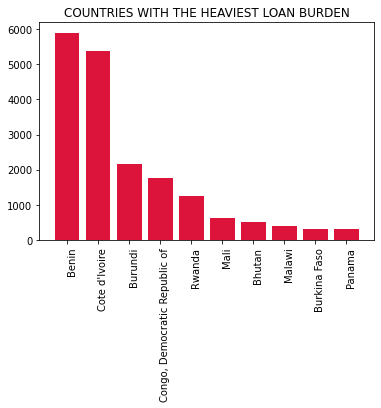

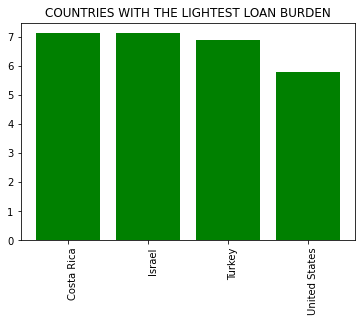

In [51]:
fig, ax = plt.subplots()

ax.bar(tab8.head(10).iloc[:,0],
       tab8.head(10)['% of monthly expenditure, 2017'],
       color='crimson')

#plt.ylabel('Funding gap per loan')

ax.set_xticklabels(labels=tab8.head(10).iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')

#plt.xlabel('Sectors')

plt.title('COUNTRIES WITH THE HEAVIEST LOAN BURDEN')

plt.show()

print ('\n')

fig, ax = plt.subplots()

ax.bar(tab8.tail(10).iloc[:,0],
       tab8.tail(10)['% of monthly expenditure, 2017'],
       color='green')

#plt.ylabel('Funding gap per loan')

ax.set_xticklabels(labels=tab8.tail(10).iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')

#plt.xlabel('Sectors')

plt.title('COUNTRIES WITH THE LIGHTEST LOAN BURDEN')

plt.show()

<br>

_**2. What geographical regions have the highest and lowest levels of poverty?**_

This is measured by the Multidimensional Poverty Index (MPI). This was obtained as follows:

In [52]:
print(loan_data_copy.shape)
print('Number of null values in the "region" column: ',loan_data_copy['region'].isnull().sum())
print('Number of null values in the "country_code" column: ',loan_data_copy['country_code'].isnull().sum())
print('Number of null values in the "country" column: ',loan_data_copy['country'].isnull().sum())
print('')
print('N/B: ', loan_data_copy[loan_data_copy['region'].isin(location_data['region']) == False].shape[0],
      'number of loan records have regions that are not covered in both datasets.')
print('     ', loan_data_copy[loan_data_copy['country'].isin(location_data['country']) == False].shape[0],
      'number of loan records have countries that are not covered in both datasets.')

(671205, 26)
Number of null values in the "region" column:  56800
Number of null values in the "country_code" column:  8
Number of null values in the "country" column:  0

N/B:  558379 number of loan records have regions that are not covered in both datasets.
      80765 number of loan records have countries that are not covered in both datasets.


<br>

**Based on country:**

<br>

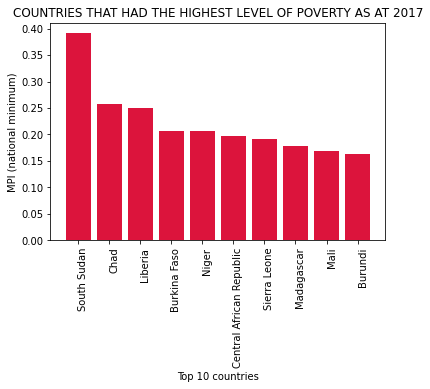

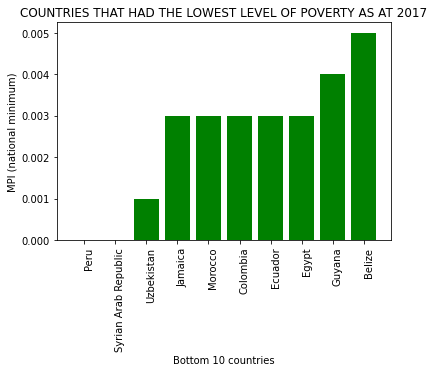

In [53]:
# Let's first get a national average for MPI
# create a pivot-table
tab9 = pd.pivot_table(location_data, values=['MPI'], index=['country'], aggfunc='min')

# rename the MPI
tab9.columns = ['national_minimum_of_MPI']

# make some index entries into columns
tab9 = tab9.reset_index(level=['country'])

# sort the results in descending order
tab9 = tab9.sort_values(by=['national_minimum_of_MPI'], ascending=False)

# display all results
fig, ax = plt.subplots()
ax.bar(tab9.iloc[0:10,0], tab9.iloc[0:10,1], color='crimson')
plt.ylabel('MPI (national minimum)')
ax.set_xticklabels(labels=tab9.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 countries')
plt.title('COUNTRIES THAT HAD THE HIGHEST LEVEL OF POVERTY AS AT 2017')
plt.show()

print('\n')

# sort the results in ascending order
tab9 = tab9.sort_values(by=['national_minimum_of_MPI'], ascending=True)

# display all results
fig, ax = plt.subplots()
ax.bar(tab9.iloc[0:10,0], tab9.iloc[0:10,1], color='green')
plt.ylabel('MPI (national minimum)')
ax.set_xticklabels(labels=tab9.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Bottom 10 countries')
plt.title('COUNTRIES THAT HAD THE LOWEST LEVEL OF POVERTY AS AT 2017')
plt.show()

<br>

Based on the results above, countries with high MPI values are not receiving the most funding - in fact, El-Salvador, a country with one of the lowest MPI scores was one of the top 10 countries that received the most funding.

**Based on in-country regions:**

In [54]:
region_data = loan_data_copy[loan_data_copy['region'].isin(location_data['region']) == True]
region_data = region_data.copy()

tab10 = pd.pivot_table(region_data, values=['funded_amount', 'loan_amount',
                                            'number_of_all_borrowers', 'monthly_loan_repayment'],
                       index=['region'], aggfunc='sum')

# make some index entries into columns
tab10 = tab10.reset_index(level=['region'])

tab11 = pd.pivot_table(region_data, values=['id'],
                       index=['region'], aggfunc='count')

# rename the aggregated column
tab11.columns = ['number_of_loans']

# make some index entries into columns
tab11 = tab11.reset_index(level=['region'])

In [55]:
# initial status message
print('The shape of tab10 before merge: ', tab10.shape)

# join the data, keeping only relevant entries
tab10 = tab10.merge(tab11, on='region')

# final status message
print('The shape of tab10 after merge: ', tab10.shape)


# initial status message
print('The shape of tab10 before merge: ', tab10.shape)

# join the data, keeping only relevant entries
tab10 = tab10.merge(location_data, on='region')

# final status message
print('The shape of tab10 after merge: ', tab10.shape)

The shape of tab10 before merge:  (131, 5)
The shape of tab10 after merge:  (131, 6)
The shape of tab10 before merge:  (131, 6)
The shape of tab10 after merge:  (144, 14)


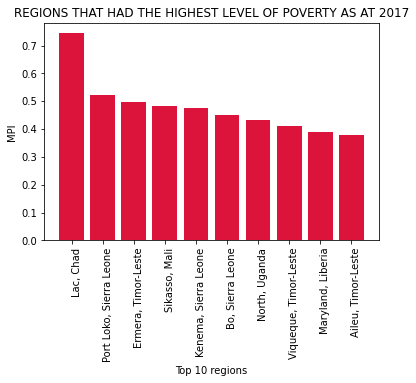

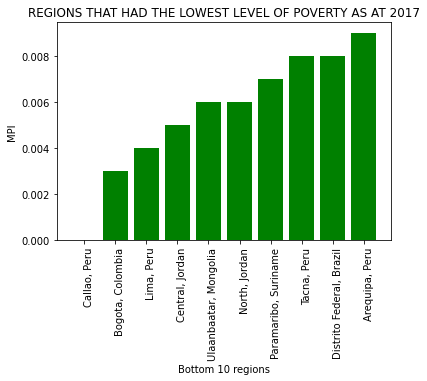

In [56]:
# sort the results in descending order
tab10 = tab10.sort_values(by=['MPI'], ascending=False)

# display all results
fig, ax = plt.subplots()
ax.bar(tab10.iloc[0:10,6], tab10.iloc[0:10,10], color='crimson')
plt.ylabel('MPI')
ax.set_xticklabels(labels=tab10.iloc[0:10,6], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 regions')
plt.title('REGIONS THAT HAD THE HIGHEST LEVEL OF POVERTY AS AT 2017')
plt.show()

print('\n')

# sort the results in ascending order
tab10 = tab10.sort_values(by=['MPI'], ascending=True)

# display all results
fig, ax = plt.subplots()
ax.bar(tab10.iloc[0:10,6], tab10.iloc[0:10,10], color='green')
plt.ylabel('MPI')
ax.set_xticklabels(labels=tab10.iloc[0:10,6], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Bottom 10 regions')
plt.title('REGIONS THAT HAD THE LOWEST LEVEL OF POVERTY AS AT 2017')
plt.show()

Peru has the third highest number of loans and it is the third most funded country; based on the graph above, it has 3 regions among countries with the lowest MPI scores with the fourth region having an unknown MPI score.

## Conclusions

The welfare of borrowers that receive the largest amount of funding on Kiva can be viewed as good because:
* Women form the bulk of the borrowers and they receive the highest number of funds, even as they have the highest shortfall.
* Countries like Peru and El Salvador which based on the data have low MPI scores have received a lot of funding
* The most valuable partnerships are those with social impact businesses, which implies that they are able to hanle regular payments as they make an income from their goods and services
* Few borrowers are taking loans for personal use
* Kenya and the Phillipines have a lot of funding for small loans; this implies that massive impact is being achieved in these countries because the loans are small enough to pay back and monthly repayments are taking up only 50% or less of their monthly income

With that said, it is concerning to see that countries that have many more people in need are not accessing large amounts of funds; furthermore, even when they do, places like Burkina Faso, Sierra Leone and Mali had a high debt burden, trapping borrowers from these countries in poverty.